# AST 208 Computational Project 2 #

Group 13: O Star Students: Nathan Shields, Brenna Chetan, Maya Joyce

AST 304, Fall 2020

Michigan State University


In [1]:
from test_eos import *
import astro_const as ac
from structure import stellar_derivatives, central_values, lengthscales, integrate, pressure_guess
from eos import *

## 2.6 Test Integration

In [22]:
#Adjusting delta_m, eta, and xi
Pc = pressure_guess(ac.Msun, 2)
m,r,p = integrate(Pc, 1e-4,5e-7,.05,2)
print("M guess =",m[-1],"kg","  R guess =",r[-1],"m","  P guess =",p[-1],"kg/(m*s^2)")

delta_m = 1e-4
eta = 5e-7
xi = 0.05
mue=2

print("delta m =",delta_m)
print("eta =", eta)
print("xi =",xi)

M guess = 6.017661562880473e+30 kg   R guess = 6113223.207222236 m   P guess = 6.632678570496524e+17 kg/(m*s^2)
delta m = 0.0001
eta = 5e-07
xi = 0.05


In [3]:
#Finding High Pc
P_high = 3.34e22
m,r,p = integrate(P_high, 1e-4,5e-7,.05,2)
print("mass =" ,m[-1]/ac.Msun, "solar masses")
print("P high =", P_high)

mass = 1.0063333846615787 solar masses
P high = 3.34e+22


In [4]:
#Finding low Pc
P_low = 1.51e19
m,r,p = integrate(P_low, 1e-4,5e-7,.05,2)
print("mass =",m[-1]/ac.Msun, "solar masses")
print("P low =", P_low)

mass = 0.09984147171549451 solar masses
P low = 1.51e+19


## 2.7 Make Mass Radius Table

In [5]:
#Function to use with bisect
def f(Pc,Mwant,delta_m,eta,xi,mue):
    m,r,p = integrate(Pc,delta_m,eta,xi,mue)
    M = m[-1]
    return(M-Mwant)

In [6]:
#Finding optimized Pc for specific white dwarf masses between 0.1 and 1 solar masses
import pandas as pd
from scipy import optimize
masses = ac.Msun*np.arange(0.1,1.1,0.1)
P = np.zeros(10)
R = np.zeros(10)
Pmks = np.zeros(10)
rhomks = np.zeros(10)
rho = np.zeros(10)
for i in range(len(masses)):
    Pc = optimize.bisect(f,P_low,P_high,args = (masses[i],delta_m,eta,xi,mue))
    m,r,p = integrate(Pc,delta_m,eta,xi,mue)
    P[i] = Pc
    R[i] = r[-1]
    Pmks[i] = Pc/(ac.G*(masses[i])**2*R[i]**(-4))
    rhomks[i] = density(P[i],mue)
    rho[i] = rhomks[i]/((3*masses[i])/(ac.fourpi*R[i]**3))

In [30]:
diction = {"$$\\frac{M}{M_{\\odot}}$$":np.arange(.1,1.1,.1), "$\\frac{R}{R_{\\odot}}$":R/ac.Rsun,"$P_c$ (MKS)": P,
          "$\\frac{P_c}{GM^2R^{-4}}$":Pmks, "$\\rho_c$ (MKS)": rhomks, "$\\rho$": rho}

table = pd.DataFrame(diction)
table

,$$\frac{M}{M_{\odot}}$$,$\frac{R}{R_{\odot}}$,$P_c$ (MKS),$\frac{P_c}{GM^2R^{-4}}$,$\rho_c$ (MKS),$\rho$
0,0.1,0.027382,1.518007e+19,0.757552,4.063113e+07,5.917101
1,0.2,0.021733,1.530055e+20,0.757563,1.625245e+08,5.917164
2,0.3,0.018986,5.911230e+20,0.757589,3.656802e+08,5.917318
3,0.4,0.017250,1.542199e+21,0.757574,6.500981e+08,5.917227
4,0.5,0.016014,3.244692e+21,0.757674,1.015778e+09,5.917817
5,0.6,0.015069,5.958146e+21,0.757600,1.462721e+09,5.917378
6,0.7,0.014314,9.960179e+21,0.757573,1.990925e+09,5.917221
7,0.8,0.013691,1.554439e+22,0.757585,2.600392e+09,5.917290
8,0.9,0.013164,2.301876e+22,0.757624,3.291121e+09,5.917519
9,1.0,0.012710,3.270445e+22,0.757685,4.063112e+09,5.917876


## 2.8 Compare to Observations

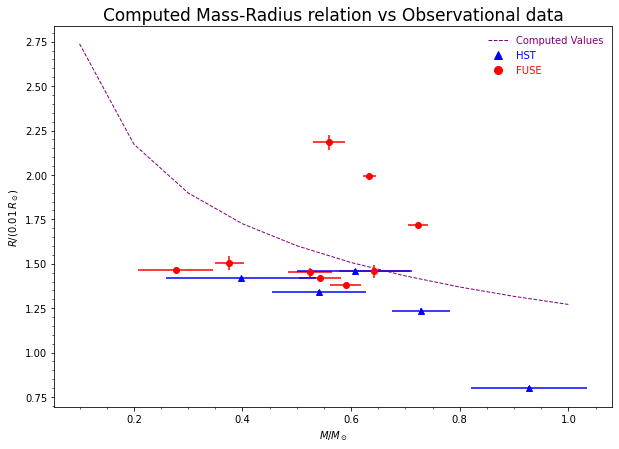

In [9]:
import matplotlib.pyplot as plt
from observations import MassRadiusObservations, make_observation_plot
import seaborn as sns

obs = MassRadiusObservations()

fig = plt.figure(figsize = (10,7))

ax =fig.add_subplot()
ax.plot(masses/ac.Msun,R/(0.01*ac.Rsun),label="Computed Values",linestyle = 'dashed', linewidth = 1,color = 'purple')
make_observation_plot(ax, obs)
ax.set_title('Computed Mass-Radius relation vs Observational data',fontsize=17)
plt.show()

## Report

Before beginning the integration process to determine the mass-radius relationship for white dwarfs, we tested our equation of state functions for pressure and density that are written in eos.py and the test_eos.py returned a TRUE value, indicating that the EOS function we constructed was correct and all of our values were within the allowed tolerance.


To get the values of δ, η, and ξ, we had to estimate with our `integrate` function. The procedure to get these values is simple, but it was hard to determine how small these values should be. We settled with δ = 1e-4, η = 5e-7, and ξ = 0.05. These were the values that produced stable results when varying other parameters. These parameters also produced solid results for the table above, boosting our confidence in them. These values would prove useful when calculating the scalings for central pressure and density. As seen in **2.6**, P_guess does a horrible job, giving us a mass 3 times larger than what we started with! We had to scale back P_guess to get sensible consistent results. Using `bisect`, we were able to optimize P_guess and get back the same mass we handed `integrate`. Bisect also had arguments for an lower and upper bounds, these bounds were P_low and P_high, calulated in **2.6**.


Looking at the plot above, we see that, according to our model, radius decreases at a decreasing rate as the mass of the white dwarf increases. As you can see, our projected mass-radius relationship does not align very well with the observed data from HST and FUSE. It only passes through the error bars of two of the data points. This suggests our model of a white dwarf is not very realistic, and not a reliable predictor of the physical properties of dwarf stars. That being said, it does appear to have the same general shape as the data, so it could be used as a model of white dwarfs with a very low confidence, or if high precision was not needed.